In [10]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Cleaning our Dataset

In [11]:
# INPUT                                                                                                                                     
all_tweets = 'tweets/all_tweets.csv' 
url_by_id = 'https://twitter.com/statuses/'
df = pd.read_csv(all_tweets) 
df['id'] = url_by_id + df['id'].astype(str)

print(df.shape)
df.head(2)

(46065, 5)


,user,datetime,text,id,entities
0,realDonaldTrump,2015-01-07 21:42:11 UTC,Via @TheYBF: “@msvivicafox Attends A Private S...,https://twitter.com/statuses/552943302518272000,http://theybf.com/2015/01/06/the-apprentices-c...
1,realDonaldTrump,2015-01-07 21:55:38 UTC,My condolences and prayers to the victims of t...,https://twitter.com/statuses/552946688558907393,NaN


## Separate Tweets

In [12]:
pres = [
    'realDonaldTrump', 'POTUS',
]

gov = [ 
    'WhiteHouse', 'PressSec', 'RudyGiuliani', 'StephenBannon', 'jeffsessions', 'USAGSessions',
    'KellyannePolls', 'GenFlynn', 'KrisKobach1787', 'KansasSOS', 'SebGorka', 'FAIRImmigration',
]
news = [
    'NBCNews', 'CNN', 'cnnbrk', 'FoxNews', 'AP', 'nytimes', 'BreitbartNews', 'guardian',                           
]


def organize(df, users):
    # get certain groups
    df_new = df.copy()
    df_new = df_new[ df_new['user'].isin(users) ]
    
    # reindex
    df_new.index = range(df_new.shape[0])   
    
    # sort by date
    df_new.iloc[:,1] = pd.to_datetime(df_new['datetime'], format='%Y-%m-%d %H:%M:%S %Z' )
    df_new = df_new.sort_values(by='datetime', ascending=False)
    
    # sort by user
    df_n = pd.DataFrame()
    for group_name, df_g in df_new.groupby(['user']):
        df_n = df_n.append(df_g, ignore_index=True)
    
    # reindex
    df_n.index = range(df_n.shape[0])
    
    return df_n

df_pres = organize(df, pres)
df_gov  = organize(df, gov)
df_news = organize(df, news)

In [13]:
print(df_pres.shape)
df_pres.head(3)

(444, 5)


,user,datetime,text,id,entities
0,POTUS,2017-03-01 02:41:32,Obamacare is collapsing – and we must act deci...,https://twitter.com/statuses/836768336163799040,NaN
1,POTUS,2017-03-01 02:31:45,My team is developing historic tax reform that...,https://twitter.com/statuses/836765872991633408,NaN
2,POTUS,2017-02-26 18:45:40,"Russia talk is FAKE NEWS put out by the Dems, ...",https://twitter.com/statuses/835923804983603202,NaN


# Selected Tweets

In [14]:
keywords = ['ban', 'Islam', 'Islamic', 'ISIS', 'mosque', 'muslim', 'muslims', 'radical', 'refugee', 
            'register', 'registry', 'religion', 'religious', 'terror']

keywords = ['ban', 'Islam', 'ISIS', 'mosque', 'muslim', 'radical', 'refugee', 
            'register', 'registry', 'religion', 'religious', 'terror',
            'executive', 'order', 'immigrant',
           ]

keywords = [k.lower() for k in keywords]
pattern = '|'.join(keywords)
pattern

'ban|islam|isis|mosque|muslim|radical|refugee|register|registry|religion|religious|terror|executive|order|immigrant'

In [15]:
# get certain groups
df1 = df_pres[ df_pres.text.str.lower().str.contains(pattern) ]
    
# reindex
df1.index = range(df1.shape[0])   

# write                                                                                            
df1.to_csv('president_tweets.csv', mode='w', index=False)
print(df1.shape)
df1.head(3)

(309, 5)


,user,datetime,text,id,entities
0,POTUS,2017-02-26 18:45:40,"Russia talk is FAKE NEWS put out by the Dems, ...",https://twitter.com/statuses/835923804983603202,NaN
1,POTUS,2017-02-24 19:46:14,This afternoon I signed an executive order to ...,https://twitter.com/statuses/835214271453806592,https://twitter.com/i/web/status/8352142714538...
2,POTUS,2017-02-03 19:13:44,Remarks by President Trump at Signing of Execu...,https://twitter.com/statuses/827595948469673986,https://www.whitehouse.gov/the-press-office/20...


In [16]:
# get certain groups
df2 = df_gov[ df_gov.text.str.lower().str.contains(pattern) ]
    
# reindex
df2.index = range(df2.shape[0])   

# write                                                                                           
df2.to_csv('administration_tweets.csv', mode='w', index=False)
print(df2.shape)
df2.head(3)

(1638, 5)


,user,datetime,text,id,entities
0,FAIRImmigration,2017-03-29 14:30:01,Iraqi Refugees Arrested in Virginia with Ties ...,https://twitter.com/statuses/847093491532468224,http://bit.ly/2mPKP0z
1,FAIRImmigration,2017-03-29 12:30:02,De Blasio Claims Sanctuary Status Keeps NYC Sa...,https://twitter.com/statuses/847063295857188868,http://bit.ly/2nx4Yau
2,FAIRImmigration,2017-03-27 15:30:04,Click the link to watch FAIR's Executive Direc...,https://twitter.com/statuses/846383829254332418,http://bit.ly/2nXJZOY


In [17]:
# get certain groups
df3 = df_news[ df_news.text.str.lower().str.contains(pattern) ]
    
# reindex
df3.index = range(df3.shape[0])   

print(df3.shape)
df3.head(3)

(29111, 5)


,user,datetime,text,id,entities
0,AP,2017-03-11 01:26:09,Turkey aims to repair its image in West by jus...,https://twitter.com/statuses/840373244360314880,http://apne.ws/2mtNN7E
1,AP,2017-03-10 23:27:02,Calif. man pleads guilty to stabbing US airman...,https://twitter.com/statuses/840343267921281024,http://apne.ws/2mc4u6o
2,AP,2017-03-10 06:30:12,"VIDEO: Amal Clooney urges Iraq, world's nation...",https://twitter.com/statuses/840087372578471936,http://apne.ws/2lJGImj


# Analysis

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import RegexpTokenizer

stop = stopwords.words('english') 
tweet_tokenizer = TweetTokenizer()
word_tokenizer = RegexpTokenizer(r'\w+')

In [10]:
stop.extend(['.', ',', '?', '!', '\'','’', '"',':', ';', '-','/', '\\', '(', ')', '#', '&', 'U','S','A'] )
corpus = df1['text'].values
corpus = ' '.join(corpus)
corpus = corpus.lower()
all_tokens = tweet_tokenizer.tokenize(corpus)
all_tokens = [w for w in all_tokens if w not in stop]

fdist = nltk.FreqDist(all_tokens)

In [11]:
fdist.most_common(25) # 25 most common words

[('isis', 89),
 ('order', 64),
 ('hillary', 54),
 ('trump', 35),
 ('radical', 32),
 ('obama', 30),
 ('islamic', 28),
 ('people', 28),
 ('country', 26),
 ('great', 26),
 ('get', 25),
 ('president', 24),
 ('terrorism', 24),
 ('terrorists', 24),
 ('america', 23),
 ('terrorist', 20),
 ('@realdonaldtrump', 20),
 ('terror', 19),
 ('must', 19),
 ('crooked', 19),
 ('executive', 18),
 ('signing', 18),
 ('going', 18),
 ('time', 18),
 ('clinton', 18)]

In [12]:
from newspaper import Article

url = 'http://bit.ly/2k4fvqgEUPoll'
a = Article(url)
a.download()
a.parse()

print(a.title)
print(a.authors)
print(a.top_image)
print(a.movies)
print(a.text)

Majority in Leading EU Nations Support Trump-Style Travel Ban: Poll
['Alastair Jamieson']
https://media1.s-nbcnews.com/j/newscms/2017_06/1860461/ss-170110-migrants-serbia-winter-cr_01_2759cb78027ed04ab949ccd37eef72ba.nbcnews-fp-1200-800.jpg
[]
A majority of Europeans would support a Trump-style ban on further migration from mainly Muslim countries, according to a poll of more than 10,000 people in 10 countries.

An average of 55 percent of those surveyed for London-based think tank, Chatham House, agreed that immigration from Muslim-majority countries should be halted.

The poll released Tuesday comes after a bruising 18 months that have seen a string of terrorist massacres linked to radical Islam as well as record-setting levels of migration that have created social tensions across the continent.

Migrants wait to receive free food during a snowfall outside a derelict customs warehouse in Belgrade, Serbia on Jan. 9, 2017. Marko Djurica / Reuters, file

Majorities in all but two of the

In [13]:
a.nlp()
print(a.keywords, '\n')
print(a.summary)

['travel', 'support', 'house', 'trumpstyle', 'eu', 'supported', 'nations', 'leading', 'migration', 'muslim', 'surveyed', 'countries', 'chatham', 'poll', 'ban', 'majority'] 

A majority of Europeans would support a Trump-style ban on further migration from mainly Muslim countries, according to a poll of more than 10,000 people in 10 countries.
An average of 55 percent of those surveyed for London-based think tank, Chatham House, agreed that immigration from Muslim-majority countries should be halted.
Migrants wait to receive free food during a snowfall outside a derelict customs warehouse in Belgrade, Serbia on Jan. 9, 2017.
Chatham House called the findings "striking and sobering" and said in a news release that the figures "suggest that public opposition to further migration from predominantly Muslim states is by no means confined to Trump's electorate."
The Chatham House poll, conducted with Kantar Public, surveyed samples of over-18s in Austria, Belgium, France, Germany, Greece, Hun

In [14]:
import nltk

tokens = nltk.word_tokenize(a.text.lower())
text = nltk.Text(tokens)

text.concordance('muslim', width=60, lines=10)
#print(tokens)

Displaying 3 of 3 matches:
                           muslim countries , according to a
gration from predominantly muslim states is by no means conf
ther migration from mainly muslim countries should be stoppe


In [15]:
ngram = 15
c = nltk.ConcordanceIndex(tokens, key = lambda s: s.lower())
concodances = [text.tokens[offset-ngram:offset+ngram] for offset in c.offsets('muslim') 
               if offset>=ngram and offset<len(text.tokens)-ngram]
concordances = []
for offset in c.offsets('muslim'):
    if offset>=ngram and offset-ngram<len(text.tokens):
        string = ' '.join( text.tokens[offset-ngram:offset+ngram] )
        concordances.append(string)
    elif offset<ngram and offset-ngram<len(text.tokens):
        string = ' '.join( text.tokens[offset:offset+ngram] )
        concordances.append(string)
    elif offset>=ngram and offset-ngram>=len(text.tokens):
        string = ' '.join( text.tokens[offset:offset] )
        concordances.append(string)
        
for concordance in concordances:
    print(concordance, '\n')

muslim countries , according to a poll of more than 10,000 people in 10 countries 

news release that the figures `` suggest that public opposition to further migration from predominantly muslim states is by no means confined to trump 's electorate . '' the poll 

chatham house ( @ chathamhouse ) february 7 , 2017 'all further migration from mainly muslim countries should be stopped' agree : poland 71 % france 61 % uk 47 



In [16]:
%%time
import requests

print(url)
session = requests.Session()
resp = session.head(url, allow_redirects=True)
print(resp.url)

http://bit.ly/2k4fvqgEUPoll
http://www.nbcnews.com/storyline/europes-border-crisis/majority-leading-eu-nations-support-trump-style-travel-ban-poll-n718271
CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 265 ms


In [17]:
%%time
import urllib

print(url)
a = urllib.request.urlopen(url)
print(a.url)

http://bit.ly/2k4fvqgEUPoll
http://www.nbcnews.com/storyline/europes-border-crisis/majority-leading-eu-nations-support-trump-style-travel-ban-poll-n718271
CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 313 ms


# Clustering

In [40]:
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

from nltk.tokenize import TweetTokenizer
tweet_token = TweetTokenizer()
#tokens = tweet_token.tokenize(text)
stopwords = nltk.corpus.stopwords.words('english')
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [51]:
def preprocessor(doc):
    """Proportion of characters in document                                     
                                                                                
    :( :) :P :p :O :3 :| :/ :\ :$ :* :@                                         
    :-( :-) :-P :-p :-O :-3 :-| :-/ :-\ :-$ :-* :-@                             
    :^( :^) :^P :^p :^O :^3 :^| :^/ :^\ :^$ :^* :^@                             
    ): (: $: *:                                                                 
    )-: (-: $-: *-:                                                             
    )^: (^: $^: *^:                                                             
    <3 </3 <\3                                                                  
    o.O O.O O.o                                                                 
    :smile: :hug: :pencil:                                                      
    """                                                                         
    re_url = r"(http|https):\/\/.\S+"                                           
    re_emoji = r"(\:\w+\:|\<[\/\\]?3|[\(\)\\\D|\*\$][\-\^]?[\:\;\=]|"\
            "[\:\;\=B8][\-\^]?[3DOPp\@\$\*\\\)\(\/\|])(?=\s|[\!\.\?]|$)"    
    # remove urls                                                               
    doc = re.sub(re_url, "", doc)                                               
    # remove emoticons                                                          
    #doc = re.sub(re_emoji, "", doc)                                             
    # remove emojis   
    #try:
        # UCS-4
    #    extra = re.compile(u'[U00010000-U0010ffff]')
    #    doc = extra.sub('', doc)
    #except re.error:
        # UCS-2
    #    extra = re.compile(u'[uD800-uDBFF][uDC00-uDFFF]')
    #    doc = extra.sub('', doc)
    #regex = re.compile('[%s]' % re.escape(string.punctuation))
    #doc = regex.sub('', doc)
    
    return doc


In [52]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [53]:
s = 'Good muffins cost $3.88\nin New York.  Please buy me two of them.\n\nThanks.'
print(tokenize_and_stem(s))
print(tokenize_only(s))

['good', 'muffin', 'cost', 'in', 'new', 'york', 'pleas', 'buy', 'me', 'two', 'of', 'them', 'thank']
['good', 'muffins', 'cost', 'in', 'new', 'york', 'please', 'buy', 'me', 'two', 'of', 'them', 'thanks']


In [74]:
tweets = df3.as_matrix(columns=['text'])
print(tweets[:3])
vpreprocessor = np.vectorize(preprocessor)
tweets = vpreprocessor(tweets)
print('\n', tweets[:3])

#df_doc = df3.loc[df3['user']=='AP']
tweets = df3.loc[df3['user']=='AP']['text'].tolist()
for i in range(len(tweets)):
    tweets[i] = preprocessor(tweets[i])
print('\n', tweets[:3])

[[ 'Turkey aims to repair its image in West by justifying crackdown on free press, expression as anti-terror effort. https://t.co/zuuvtCyP2D']
 [ 'Calif. man pleads guilty to stabbing US airman who helped thwart 2015 terror attack aboard French train. https://t.co/0QQIG1geew']
 [ 'VIDEO: Amal Clooney urges Iraq, world\'s nations not to let Islamic State extremists "get away with genocide." https://t.co/4wnI5XKurR']]

 [[ 'Turkey aims to repair its image in West by justifying crackdown on free press, expression as anti-terror effort. ']
 [ 'Calif. man pleads guilty to stabbing US airman who helped thwart 2015 terror attack aboard French train. ']
 [ 'VIDEO: Amal Clooney urges Iraq, world\'s nations not to let Islamic State extremists "get away with genocide." ']]

 ['Turkey aims to repair its image in West by justifying crackdown on free press, expression as anti-terror effort. ', 'Calif. man pleads guilty to stabbing US airman who helped thwart 2015 terror attack aboard French train. '

In [75]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in tweets:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [76]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

# td-idf

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, 
                                   max_features=200000,
                                   min_df=10, 
                                   stop_words='english',
                                   use_idf=True, 
                                   tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(tweets)

print(tfidf_matrix.shape)

CPU times: user 2.39 s, sys: 12 ms, total: 2.4 s
Wall time: 2.46 s
(3546, 989)


In [78]:
terms = tfidf_vectorizer.get_feature_names()

In [79]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

# K-Means

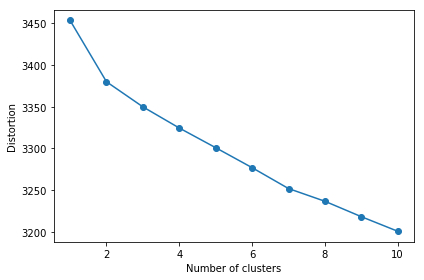

In [83]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(tfidf_matrix)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

In [99]:
from sklearn.cluster import KMeans

num_clusters = 4

km = KMeans(n_clusters=num_clusters,
            init='k-means++', 
            n_init=15, 
            max_iter=600, 
            random_state=0)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 5.78 s, sys: 0 ns, total: 5.78 s
Wall time: 5.89 s


In [100]:
from sklearn.externals import joblib

joblib.dump(km,  'doc_cluster.pkl')
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [101]:
tw = { 'tweets': tweets, 'cluster': clusters}

frame = pd.DataFrame(tw, index = [clusters] , columns = ['tweets', 'cluster'])

In [102]:
frame['cluster'].value_counts()

1    1690
0     980
2     455
3     421
Name: cluster, dtype: int64

In [106]:
print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print('-'*10,"Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :11]:
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), 
              end=',')
    print()
    print()
    print('-'*10,"Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['tweets'][:3].values.tolist():
        print(' %s,' % title)
    print()
    print()

Top terms per cluster:

---------- Cluster 0 words: b'islamic', b'state', b'islamic', b'group', b'state', b'islamic', b'says', b'iraqi', b'militants', b'syria', b'iraq',

---------- Cluster 0 titles: VIDEO: Amal Clooney urges Iraq, world's nations not to let Islamic State extremists "get away with genocide." ,
 Congress probes Defense Department's troubled anti-propaganda efforts against the Islamic State. ,
 VIDEO: Iraqi police release video from drones dropping shells on suspected Islamic State group targets in Mosul. ,


---------- Cluster 1 words: b'terror', b'order', b'attack', b'muslims', b'says', b'breaking', b"'s", b'killing', b'terrorist', b'police', b'mosque',

---------- Cluster 1 titles: Turkey aims to repair its image in West by justifying crackdown on free press, expression as anti-terror effort. ,
 Calif. man pleads guilty to stabbing US airman who helped thwart 2015 terror attack aboard French train. ,
 Human rights lawyer Amal Clooney urges world's nations not to let I

# Multidimensional Scaling

In [113]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

# Hierarchical clusterin

In [119]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

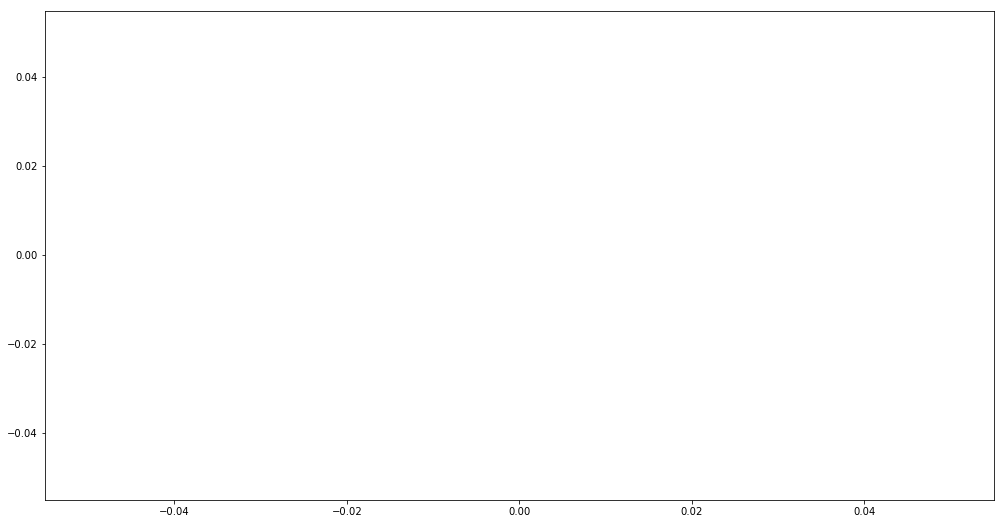

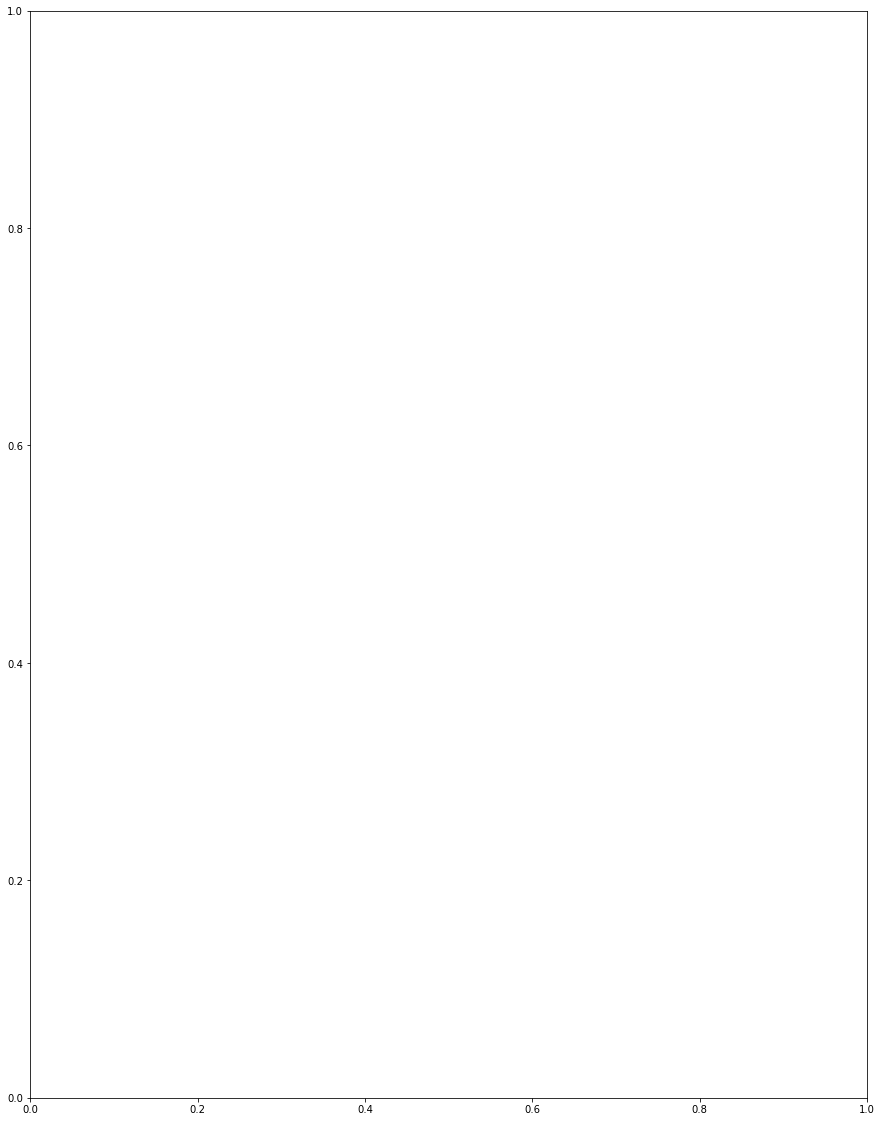

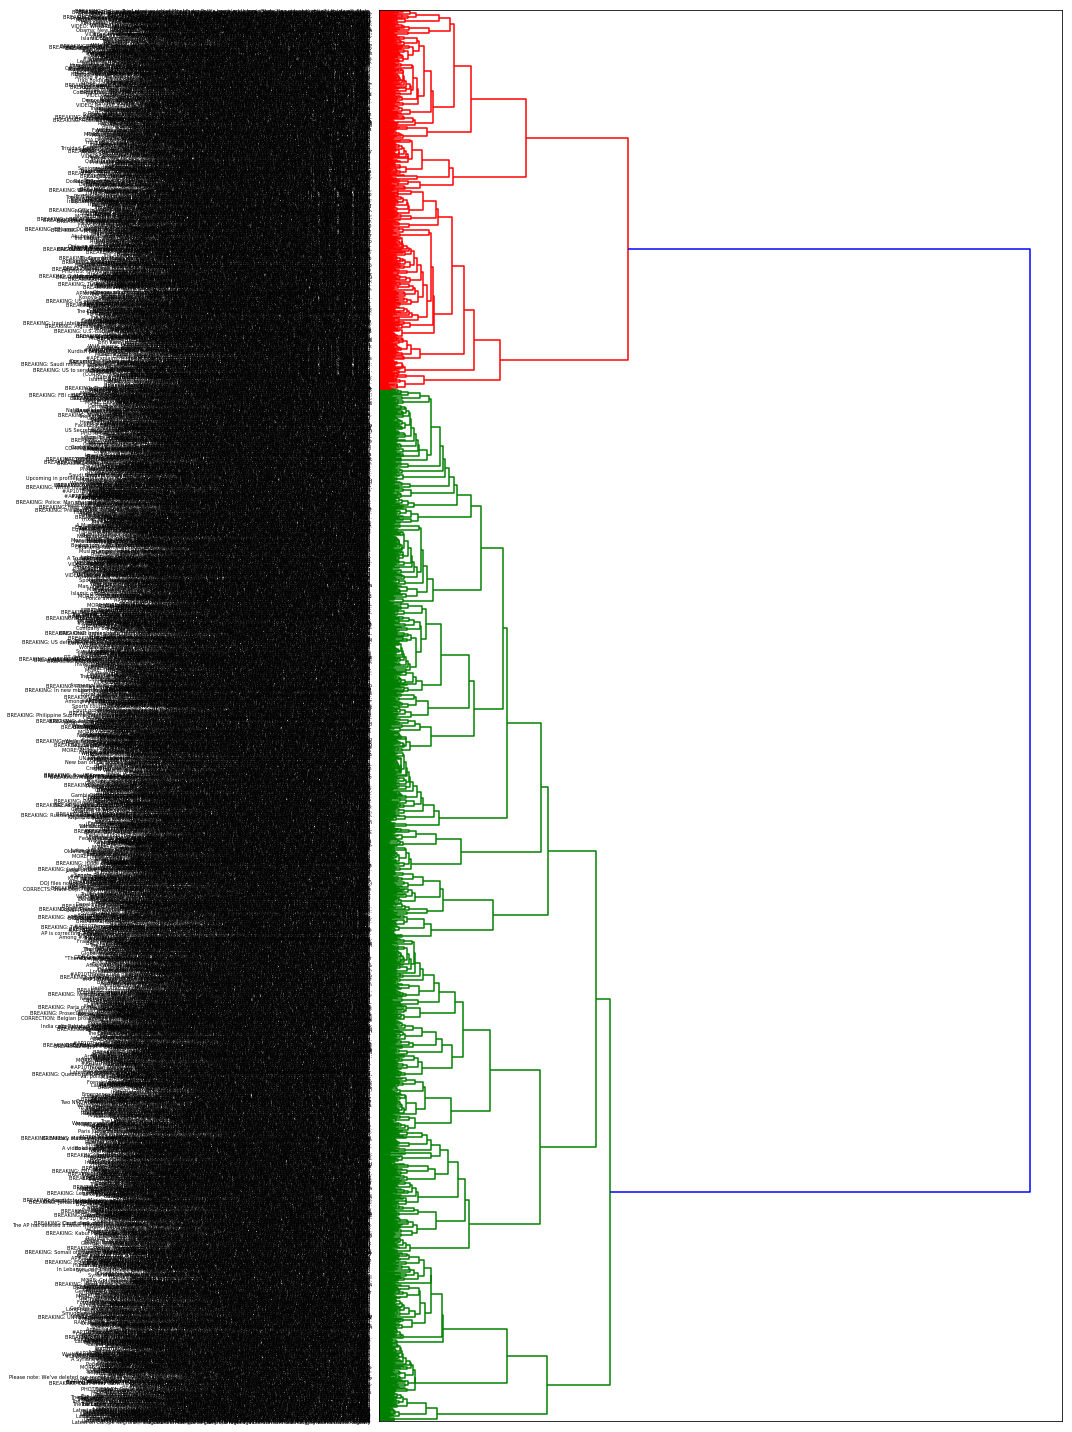

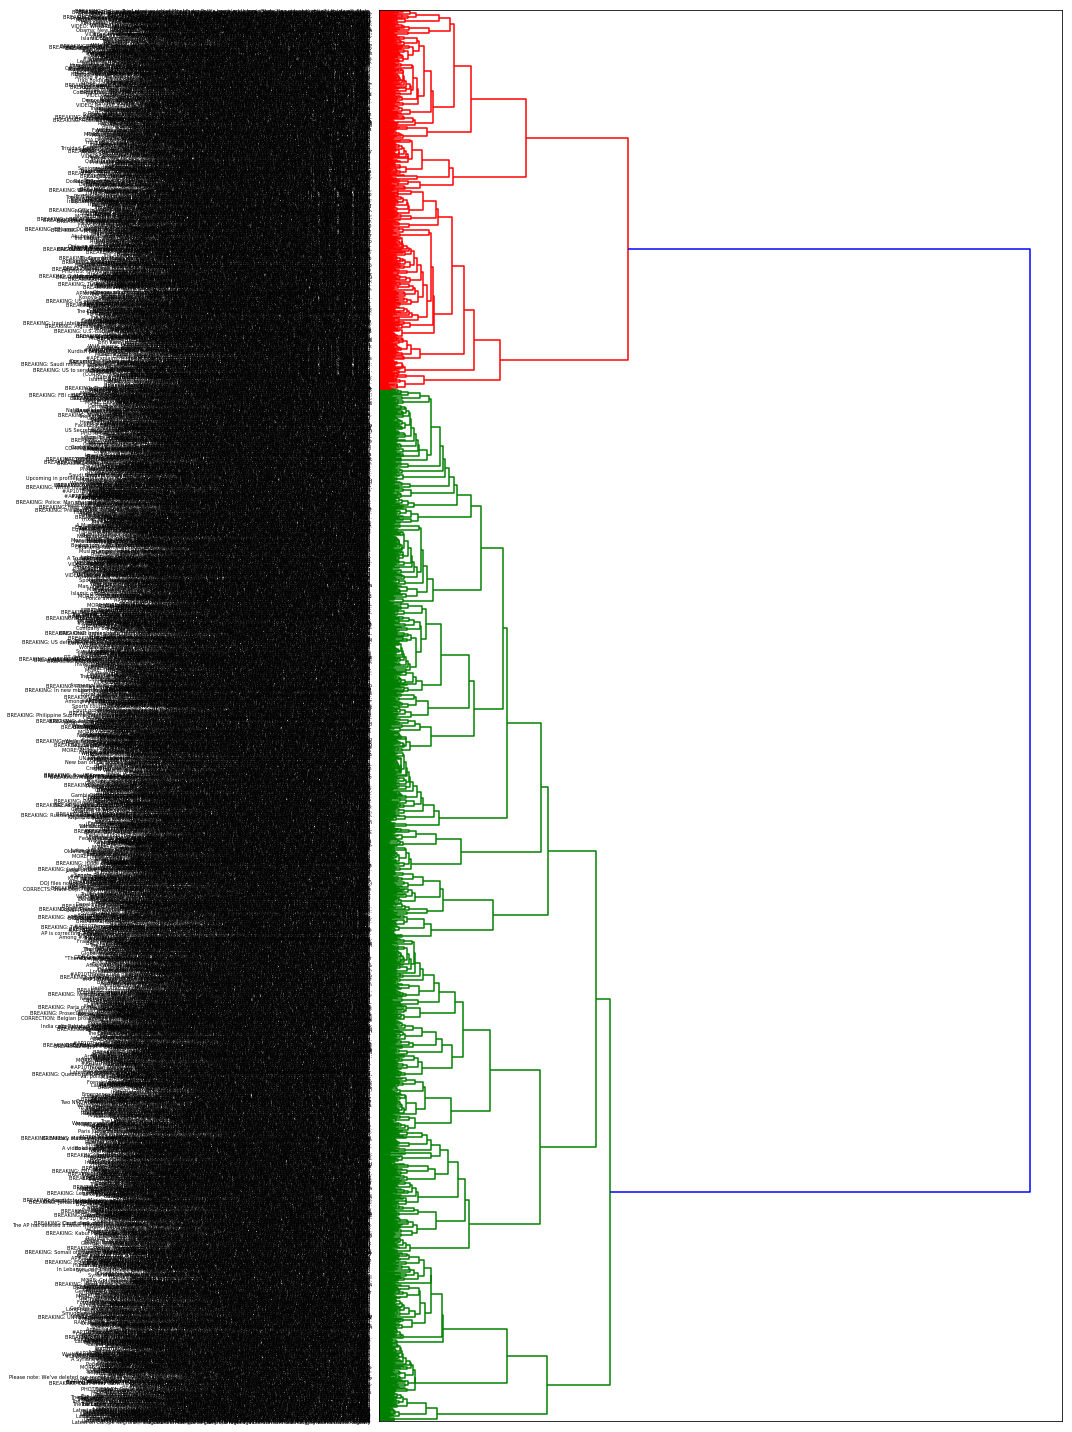

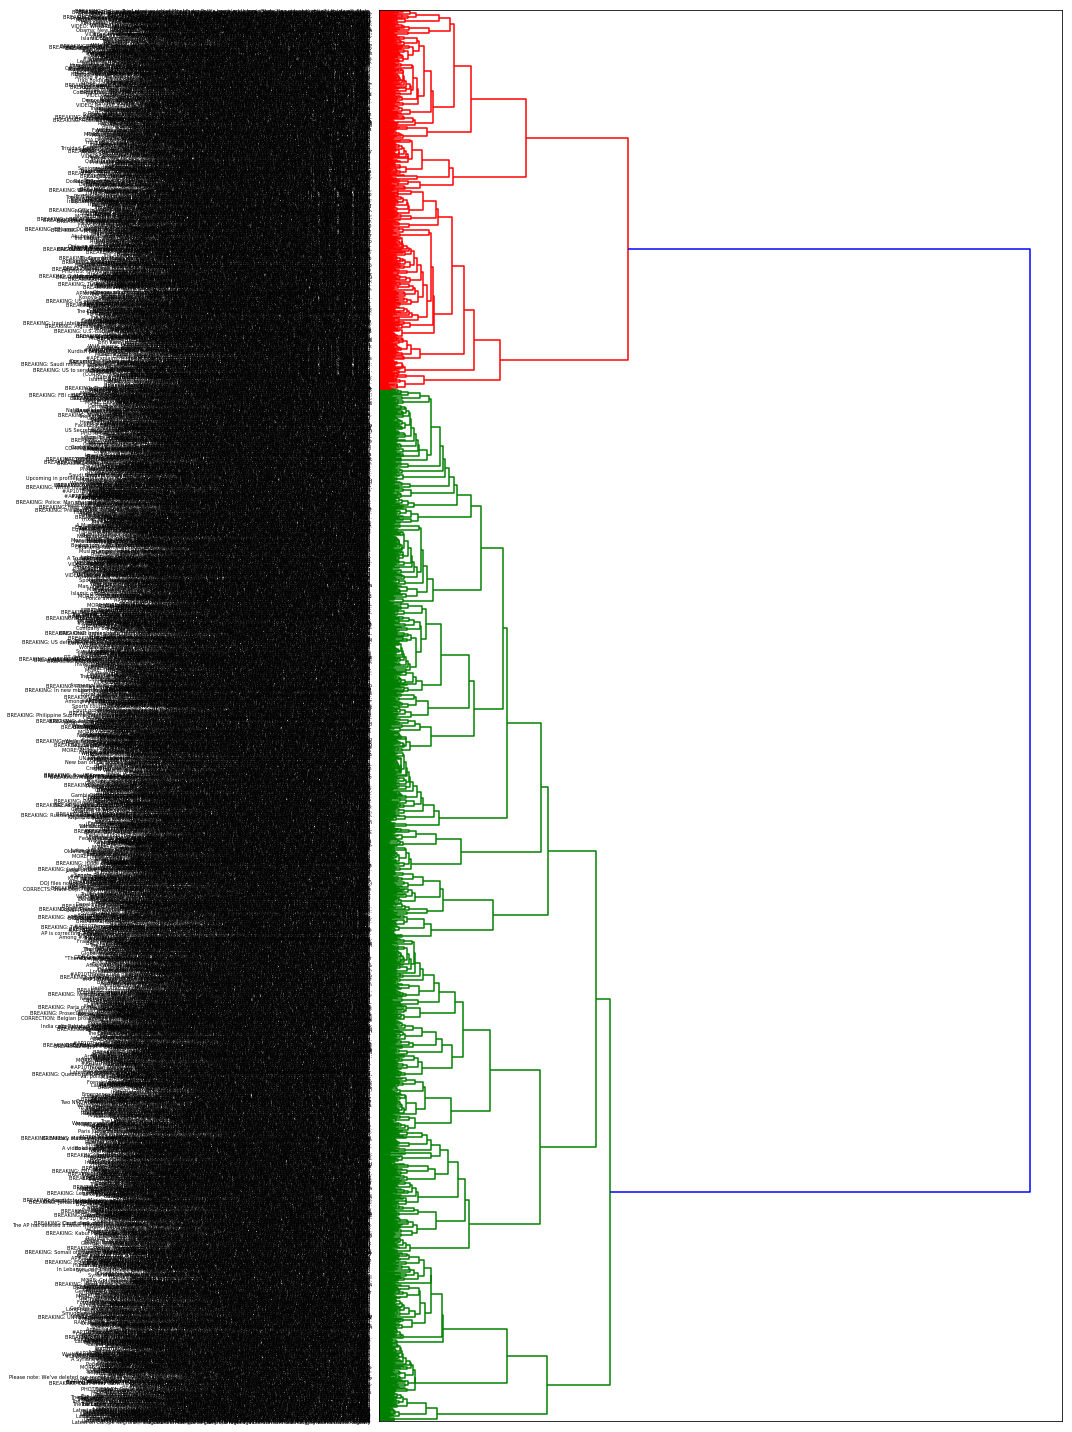

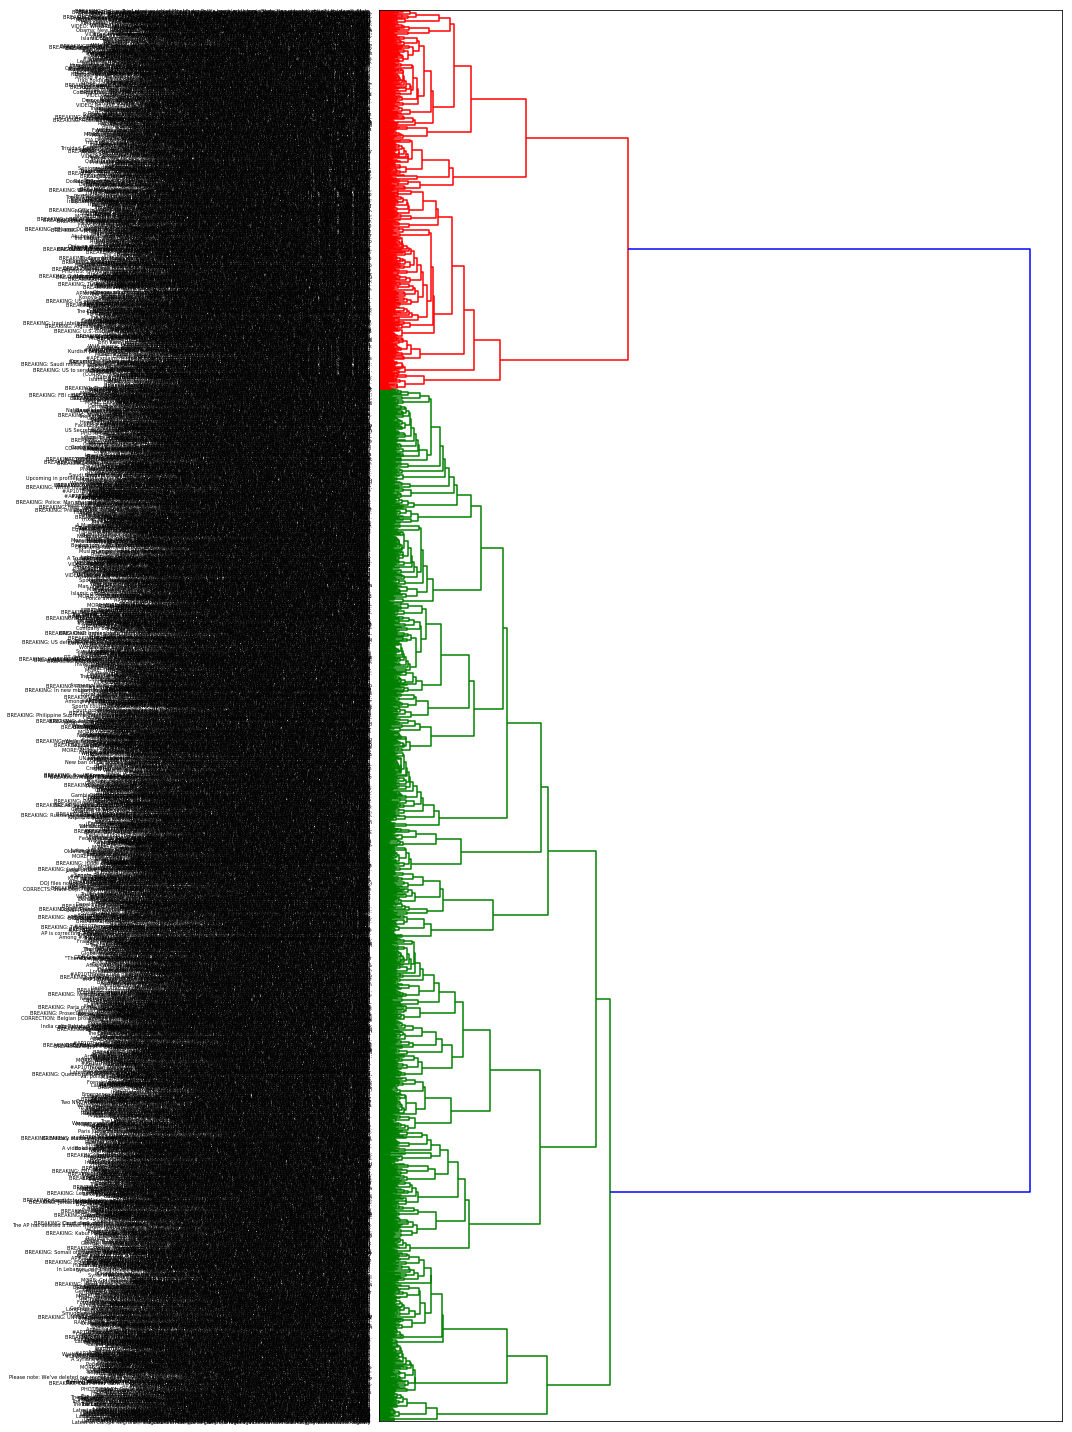

In [120]:
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=tweets);

plt.tick_params(
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters
plt.show()